# 파이썬으로 배우는 기계학습
# Machine Learning with Python
**************

# 제 8-1강: 경사하강법의 아달라인 구현

## 학습 목표
- 경사하강법의 가중치 조정 알고리즘을 학습한다.
- 아달라인 경사하강법을 구현한다. 

## 학습 내용
- 경사하강법 가중치 조정 알고리즘
- 경사하강법 스텝의 방향과 크기
- 학습률
- 아달라인 경사하강법 구현


# 제 8-2강: 경사하강법의 아달라인 적용

## 학습 목표
- 붓꽃 학습자료의 속성들을 학습한다.
- 붓꽃 학습자료를 바탕으로 아달라인 객체를 테스트한다.
- 모멘텀을 이용하여 비용함수의 값이 최소값으로 수렴하도록 한다.

## 학습 내용
- 붓꽃 학습자료 속성
- 붓꽂 학습자료 예제
- 지역 최소와 전역 최소 
- 모멘텀

In [5]:
import numpy as np
import imp
import joy
imp.reload(joy)

<module 'joy' from 'C:\\Users\\user\\Dropbox\\_MoocML\\ipynbShared\\joy.py'>

## 1. 붓꽃 학습자료$^{Iris \ Dataset}$

### 1.1 붓꽃 학습자료 소개

프로그래밍을 처음 배울 때, 'Hello World'를 출력하는 것과 같이 기계학습을 시작하면서 다루는 유명한 몇 개의 데이터셋이 있습니다. 그 중에 하나가 붓꽃 학습자료입니다.  

지금까지 우리는 가상적인 학습 자료로 기계학습을 ‘연습’하였는데, 이제 처음으로 과학자들이 실제적으로 사용하는 붓꽃 학습자료로 기계학습 알고리즘을 본격적으로 적용해보고자 합니다.  우리가 첫 번째로 시도하고자 하는 자료는 1936년에 발표된 논문(The use of multiple measurements in taxonomic problems, Ronald Fisher)에서 사용된 자료입니다. 이 자료는 기계학습 분야에서 최근에 많이 사용되고 있으며, 세 종류의 품종(세토사$^{Setosa}$, 버시칼라$^{Versicolor}$, 버지니카$^{Virginica}$)의 붓꽃$^{Iris}$에서 각각 50개의 표본$^{sample}$ 즉 총 150개의 표본을 추출하였습니다. 각 표본$^{sample}$ 에는 4개의 특성$^{feature}$, 즉 꽃잎$^{petal}$의 길이와 너비, 꽃받침$^{sepal}$의 길이와 너비, 그리고 붓꽃 종류의 이름을 포함하고 있습니다. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/iris3photo.png?raw=true" width="600">
<center>그림 1: 세 종류의 붓꽃</center>

### 1.2 특성행렬 표기

이러한 붓꽃 학습자료를 파일에 저장되어 있는 형태대로 특성 행렬$^{feature \ matrix} \mathbf{X}$로 표기하면, 각 행은 샘플을 나타내며, 각 열은 특성을 나타내게 됩니다. 그러면, $\mathbf{X}$는 150x4 행렬이며, (m x n)은 (m examples, n features)의 형식입니다. 클래스 레이블은 y로 표기하며 합니다. 수학적으로는 다음과 같이 표기하며, 여기서 $\mathbb{R}$은 실수$^{real \ number}$를 나타내며, $\in$은 집합에 속한다는 의미입니다. $x^{(i)}$윗 첨자(i)는 입력하는 학습자료의 일련번호 즉 행을 나타내고, $x_j$아랫 첨자 $j$는 학습 자료의 특성을 나타냅니다. 

\begin{align}
  \mathbf{X} \in  \mathbb{R}^{150x4} 
\end{align}

\begin{align}
\mathbf{X} = 
\begin{pmatrix}
   x^{(1)}_1 & x^{(1)}_2  & x^{(1)}_3 & x^{(1)}_4\\
   x^{(2)}_1 & x^{(2)}_2  & x^{(2)}_3 & x^{(2)}_4\\
   \vdots & \vdots & \vdots & \vdots \\
   x^{(150)}_1 & x^{(150)}_2  & x^{(150)}_3 & x^{(150)}_4
\end{pmatrix} 
\end{align}

특성 행렬$^{feature \ matrix} \mathbf{X}$의 행$^{row}$은 한 붓꽃 샘플의 4가지 특성들을 의미하며, 다음과 같이 표기할 수 있습니다. 
\begin{align}
  \mathbf{x}^{(i)} \in  \mathbb{R}^{1x4} 
\end{align}

\begin{align}
\mathbf{x}^{(i)} = 
\begin{pmatrix}
   x^{(i)}_1 & x^{(i)}_2 & x^{(i)}_3 & x^{(i)}_4 
\end{pmatrix}
\end{align}

특성 행렬$^{feature \ matrix} \mathbf{X}$의 열$^{column}$은 무엇을 의미하는지 짐작할 수 있겠죠?  열은 전체 표본에 대하여 붓꽃 표본의 네가지 특성들 중에 하나를 나타냅니다.  그 중에 하나의 특성인 j번째 특성을 추출하면 다음과 같은 150x1의 컬럼 벡터가 됩니다. 

\begin{align}
  \mathbf{x}_j \in  \mathbb{R}^{150x1} 
\end{align}

\begin{align}
\mathbf{x}_j = 
\begin{pmatrix}
   x^{(1)}_j\\
   x^{(2)}_j\\
   \vdots \\
   x^{(150)}_j
\end{pmatrix}
\end{align}

그러면 붓꽃자료에 마지막 남아 있는 자료는 레이블 벡터 $\mathbf{y}$ 이 됩니다. 각 샘플이 어떤 종류의 품종에 해당하는지 표시하는 세 클래스 레이블은 다음과 표기합니다. 이 벡터에는 전체 표본에 대한 레이블을 표시하게 되며, 레이블은 'Setosa', 'Vericolor', 'Virginica' 중 하나가 표시 됩니다.

\begin{align} \mathbf{y} \in  \mathbb{R}^{150x1} \end{align}

\begin{align}
 \mathbf{y} = 
 \begin{pmatrix}    y^{(1)}\\    y^{(2)}\\    \vdots \\    y^{(150)} \end{pmatrix}, 
 \quad y \in big({Setosa, Vericolor, Virginica} \big)
\end{align}

__JoyPopQuiz__:

다음의 표기는 무엇을 의미하는지 설명하십시오. 

- $x^{(1)}_4 = 3$

__JoyPopAnswer__: 첫번째 표본의 4번째 특성값 (꽃잎의 길이) 이 3cm 라는 의미입니다.



__JoyPopQuiz__:<br>
다음의 표기는 무엇을 의미하는지 설명하십시오.
- $y^{(3)}$ = 'Vericolor'

__JoyPopAnswer__: 3번째 표본의 클래스 레이블은 'Vericolor'입니다.

###  1.3 특성 행렬의 형상: $\mathbf{X} \in  \mathbb{R}^{150x4}$ vs $\mathbf{X} \in  \mathbb{R}^{4x150}$

여기서 유의할 점은 기계학습 연구자들이 특성행렬을 항상 (m x n) 즉 (m examples, n features)의 형식으로 나타내는 것은 아닙니다.  어떤 이들은 (n x m) 즉 (n features, m examples) 형식을 내기도 합니다. 

우리 강의에서도 이런 두 가지 형식을 때에 따라 적절한 것을 택하여 사용할 것입니다. 붓꽃 자료에서는 자료가 (m x n) 형식으로 저장되어 있기에, 파일에 있는 그대로 읽고, 그 형식대로 자료 구조를 만들었기 때문에 (m x n)형식을 사용합니다. 여러분도 이렇게 서로 다른 특성 행렬의 형상을 다루는데 익숙해지길 바랍니다.

### 1.4 붓꽃 학습자료 읽어오기

이 붓꽃$^{Iris}$자료는 얼바인 캘리포니아 대학교$^{UC \ Irvine}$의 기계학습 데이타베이스에서 다음과 같이 추출하여 관찰할 수 있습니다.  데이터베이스에서 자료를 추출하기 위하여 Python의 판다스$^{pandas}$사용하였는데, `DataFrame`은 2차원의 자료를 표현하는데 적합한 아주 유용한 판다스 자료구조 형식입니다. 판다스 `DataFrame`의 `head()`와 `tail()` 메소드는 자료의 처음과 마지막 부분 몇 개를 볼 수 있습니다.  자료의 각 열은 꽃잎의 길이, 너비, 꽃받침의 길이와 너비, 꽃의 종류 순서 즉 세토사, 버시칼라, 버지니카 순서로 각각 50개의 샘플들로 저장되어 있습니다.  길이와 너비의 단위는 cm입니다.

만약, 얼바인 대학의 서버가 작동하지 않으면, 여러분의 컴퓨터에 자료를 미리 다운을 받아 두고 다음과 같은 코드로 자료를 읽을 수 있습니다. 

```
df = pd.read_csv('my_local/path/data/iris.data', header=None)```

다음 셀에서 코드를 읽고, 앞 부분을 출력해봅니다. 

In [61]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 1.5 붓꽃 학습자료 시각화

Panda DataFrame형식으로 저장되어 있는 세 종류의 붓꽃 150개의 샘플 중에 처음 100개 샘플 즉 세토사와 버시칼라 샘플을 각각 50개씩 읽어오고, 또한 그 샘플 중에 첫번째와 세번째의 특성인 꽃잎과 꽃받침의 길이만 추출하여 시각화하는 코드는 다음과 같습니다. 

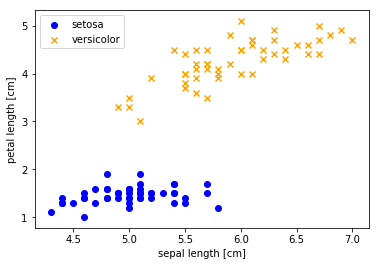

X.shape(100, 2), y.shape(100,)


In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# read iris data set
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 1, -1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1], color='blue', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='orange', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='best')

# plt.savefig('images/setosa_versicolor.png', dpi=300)
plt.show()
print('X.shape{}, y.shape{}'.format(X.shape, y.shape))

__JoyPopQuiz__: X와 y의 shape은 각각 무엇입니까?

__JoyPopAnswer__: <br>
X: 100 x 2<br>
y: 100 x 1

__자료 시각화__

우리가 지금까지 사용해온 `plot_xyw()` 함수를 이용하여도 간단히 시각화할 수 있습니다. 

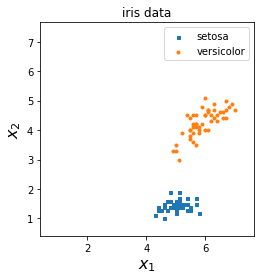

In [63]:
joy.plot_xyw(X, y, title='iris data', classes=['setosa','versicolor'])

### 1.5 붓꽃 학습자료 시각화 

특성 자료 축 $x_1, x_2$의 최대값과 최소값을 관찰하며 표준화로 인한 변화를 볼 수 있습니다. 

[[-0.5810659  -1.01435952]
 [-0.89430898 -1.01435952]
 [-1.20755205 -1.08374115]]


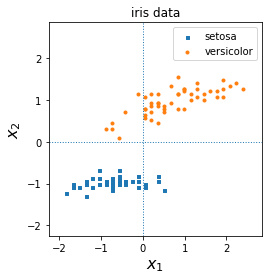

In [64]:
mu, sigma = X.mean(axis=0), X.std(axis=0)
Xstd = (X - mu) / sigma
print(Xstd[:3])
joy.plot_xyw(Xstd, y, title='iris data', classes=['setosa','versicolor'])

## 2. AdalineGD 클래스 구현

이는 경사하강법을 사용하여 구현한 아달라인(Adaptive Linear Neuron) 이진 분류기를 구현한 클래스이며, 주요 메소드와 인자는 다음과 같습니다. 

- __init()__: Perceptron 클래스로 마찬가지로`__init()__`함수의 인자는 학습률 eta, 반복횟수 epochs, 난수시드 random_seed입니다. 인스턴스 생성할 때 인자로 전달할 수 있습니다. 

- __fit()__: 훈련자료로 가중치를 구하는 메소드입니다. 훈련자료 X와 클래스 레이블 y를 인자로 받습니다. 가중치 w를 선택적 인자로 받을 수 있으나, w를 인자를 설정하지 않으면, 작은 난수로 초기화됩니다.
    - 출력값 $\hat{y}$을 계산하는 방식이 Perceptron 클래스와 다른 점을 유의하십시오.  
    - 각 샘플마다 출력값 $\hat{y}$을 구하는 것이 아니라 모든 훈련자료를 for 루프없이 한번에 계산합니다. 각 훈련자료의 오차의 총합을 구하여, 이 오차를 줄이는 방향으로 가중치를 조정합니다. 결과적으로 epochs는 가중치가 조정되는 횟수입니다.  

- __net_input()__: 모든 훈련자료의 각 샘플과 가중치를 곱한 값의 총합 z를 계산합니다. 
- __activation()__: 활성화 함수 역활을 하는 메소드이지만, 여기서는 Identity(아이덴티티)함수를 사용함으로 계산에 아무런 아무 영향을 미치지 않습니다. 코드의 흐름 즉 개념을 보여주기 위해 구현해 둔 것입니다.  나중에 우리가 다룰 로지스틱 회귀를 구현할 때는 Identity함수 대신에 시그모이드 함수를 사용하기 위한 것입니다.  
- __predict()__: 노드(뉴론)의 출력값 즉 $\hat{y}$으로 클래스를 예측하는 메소드입니다. 



In [6]:
# Implementation of  Widrow's Adaptive Linear classifier algorithm
# Author: idebtor@gmail.com
# 2018.03.21 - Creation
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.
    Parameters
        eta: float, Learning rate (between 0.0 and 1.0)
        epochs: int, Passes over the training dataset.
        random_seed : int, Random number generator seed for reproducibility

    Attributes
        w_ : 1d-array, Weights after fitting.
        cost_ : list, Sum-of-squares cost function value in each epoch.
    """
    def __init__(self, eta=0.01, epochs=10, random_seed=1):
        self.eta = eta
        self.epochs = epochs
        self.random_seed = random_seed

    def fit(self, X, y):
        """ Fit training data.
        Parameters
            X: numpy.ndarray, shape=(n_samples, m_features), 
                Training vectors, where n_samples is the number of samples and
                n_features is the number of features.
            y : array-like, shape = [n_samples]
                Target values.
        Returns
            self : object
        """

        np.random.seed(self.random_seed)
        self.w = np.random.random(size=X.shape[1] + 1)

        self.maxy, self.miny = y.max(), y.min()
        self.cost_ = []
        self.w_ = np.array([self.w])

        for i in range(self.epochs):
            Z = self.net_input(X)
            yhat = self.activation(Z)
            errors = (y - yhat)
            self.w[1:] += self.eta * np.dot(errors, X)
            self.w[0] += self.eta * np.sum(errors)
            cost = 0.5 * np.sum(errors**2)
            self.cost_.append(cost)
            self.w_ = np.vstack([self.w_, self.w]) 
        return self

    def net_input(self, X):            
        """Compute the value of z, net input  """
        return np.dot(X, self.w[1:]) + self.w[0]

    def activation(self, X):  
        """Identity activation function: """
        return X

    def predict(self, X):      
        """Predict the class label with  """
        mid = (self.maxy + self.miny) / 2
        Z = self.net_input(X)
        yhat = self.activation(Z)
        return np.where(yhat > mid, self.maxy, self.miny)

## Adaline GD with Momentum

모멘텀은 '운동량'을 뜻이며, 관성이라고 생각할 수 있습니다. 어떤 한 방향으로 움직이던 물체가 힘을 받아 계속해서 같은 방향으로 움직이며 가속되는 물리법칙을 나타내는 것입니다. 반대 방향을 힘을 받는다면 움직임이 줄어드는 현상을 말합니다. 이를 수식으로 표현하면 다음과 같습니다. 


\begin{align} 
v := \gamma v + \eta \frac{\partial{J(w)}}{\partial{w}} 
\end{align}

여기서 새롭게 등장하는 $v$라는 기호는 속력을 나타내는 velocity의 첫글자입니다. 가속도를 나타내는 $\gamma$(감마)는 특성자료에 따라 다르지만 일반적으로 0.9의 값을 사용합니다. 그러나, 여기 예제에서 사용한 간단한 붓꽃 자료에서는 0.5 정도로 사용해서 무리하게 가속하지 않도록 합니다. 가중치에 따른 오차를 구하는 과정은 이전과 동일하고, 다만 가중치를 조정할 때, 다음과 같이 가중치 조정 값에 속력을 추가하면 됩니다. 

\begin{align} 
\mathbf{\Delta w} := \mathbf{\Delta w} + v
\end{align}


In [7]:
#%%writefile code/AdalineGD_Momentum.py
# Implementation of  Widrow's Adaptive Linear classifier algorithm
# Author: idebtor@gmail.com
# 2018.03.21 - Creation

class AdalineGD_Momentum(object):
    """ADAptive LInear NEuron classifier.
    Parameters
        eta: float, Learning rate (between 0.0 and 1.0)
        epochs: int, Passes over the training dataset.
        random_seed : int, random funtion seed for reproducibility

    Attributes
        w_ : 1d-array, Weights after fitting.
        cost_ : list, Sum-of-squares cost function value in each epoch.
    """
    def __init__(self, eta=0.01, epochs=10, random_seed=1):
        self.eta = eta
        self.epochs = epochs
        self.random_seed = random_seed

    def fit(self, X, y):
        """ Fit training data.
        Parameters
            X: numpy.ndarray, shape=(n_samples, m_features), 
                Training vectors, where n_samples is the number of 
                samples and n_features is the number of features.
            y : array-like, shape = [n_samples]
                Target values.
        Returns
            self : object
        """            
        np.random.seed(self.random_seed)
        self.w = np.random.random(size=X.shape[1] + 1)
            
        self.maxy, self.miny = y.max(), y.min()
        self.cost_ = []
        self.w_ = np.array([self.w])
        
        """Momentum"""
        self.v1 = np.zeros_like(self.w[1:])
        self.v2 = np.zeros_like(self.w[0])
        gamma = 0.5

        for i in range(self.epochs):
            yhat = self.activation(self.net_input(X))
            errors = (y - yhat)
            
            self.v1 = gamma * self.v1 + self.eta * np.dot(errors, X)
            self.v2 = gamma * self.v2 + self.eta * np.sum(errors)
            
            self.w[1:] += self.v1 #self.eta * np.dot(errors, X)
            self.w[0] += self.v2 #self.eta * np.sum(errors)
            cost = 0.5 * np.sum(errors**2)
            self.cost_.append(cost)
            self.w_ = np.vstack([self.w_, self.w]) 
        return self

    def net_input(self, X):            
        """Compute the value of z, net input  """
        return np.dot(X, self.w[1:]) + self.w[0]

    def activation(self, X):  
        """Identity activation function: """
        return X

    def predict(self, X):      
        """Predict the class label with  """
        mid = (self.maxy + self.miny) / 2
        Z = self.net_input(X)
        yhat = self.activation(Z)
        return np.where(yhat > mid, self.maxy, self.miny)

In [8]:
def fit(self, X, y):         
    np.random.seed(self.random_seed)
    self.w = np.random.random(size=X.shape[1] + 1)

    self.maxy, self.miny = y.max(), y.min()
    self.cost_ = []
    self.w_ = np.array([self.w])

    """Momentum"""
    self.v1 = np.zeros_like(self.w[1:])
    self.v2 = np.zeros_like(self.w[0])
    gamma = 0.5

    for i in range(self.epochs):
        yhat = self.activation(self.net_input(X))
        errors = (y - yhat)

        self.v1 = gamma*self.v1 + self.eta*np.dot(errors, X)
        self.v2 = gamma*self.v2 + self.eta*np.sum(errors)

        self.w[1:] += self.v1 
        self.w[0]  += self.v2 
        cost = 0.5 * np.sum(errors**2)
        self.cost_.append(cost)
        self.w_ = np.vstack([self.w_, self.w]) 
    return self

## 3. AdalineGD 클래스 사용 예제

우리가 구현한 아달라인 경사하강법 알고리즘에 붓꽃자료를 사용하여 분류를 하고자 합니다. 

### 3.1 __붓꽃자료 사용 예제__ 

1. 붓꽃자료(X, y)를 읽어옵니다. 
2. AdalineGD() 클래스를 호출하여 하나의 인스탄스(ada)를 생성합니다. 
3. 붓꽃자료로 학습$^{training}$하여 최적의 가중치를 구합니다. (결과는 인스탄스 ada에 저장되어 있습니다)
4. 결과를 시각화합니다. 

이 과정을 다음과 같이 코딩하였습니다. 

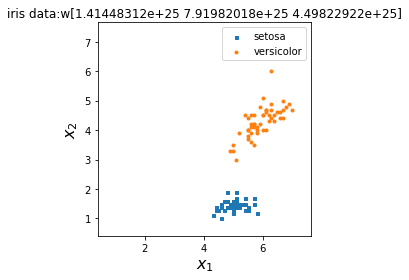

In [9]:
%matplotlib inline

X, y = joy.iris_data()
ada = AdalineGD(epochs=10, eta=0.1, random_seed = 1)
ada.fit(X, y)
joy.plot_xyw(X, y, ada.w, title='iris data', classes=['setosa','versicolor'])

시각적으로 결과를 확인하고자 하나 아무 것도 보이질 않습니다. 무엇이 잘못되었는지 추적을 해보아야 합니다.  우리가 가장 먼저할 수 있는 것은 학습 과정에서 추적하여 저장한 `cost_`자료를 시각화해보는 것입니다.  `cost_`는 각 epoch마다 계산한 비용(오차)를 저장해 둔 list 자료 형식입니다.  다음 코드를 참고를 하십시오. 

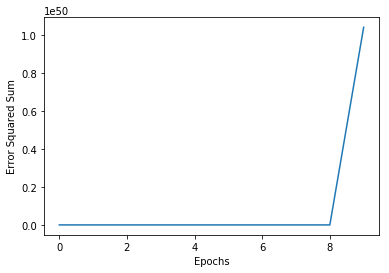

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt 

plt.plot(range(len(ada.cost_)), ada.cost_)
plt.xlabel('Epochs')
plt.ylabel('Error Squared Sum')
plt.show()

Text(0.5,1,'Adaline: epochs:10, eta:0.1')

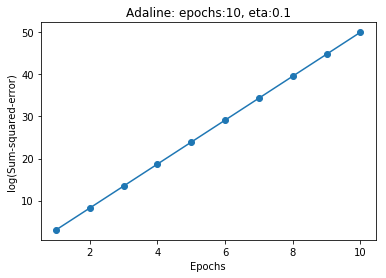

In [11]:
plt.plot(range(1, len(ada.cost_) + 1), np.log10(ada.cost_), marker='o')
plt.xlabel('Epochs')
plt.ylabel('log(Sum-squared-error)')
plt.title('Adaline: epochs:{}, eta:{}'.format(ada.epochs, ada.eta))

훈련의 반복 횟수가 늘어날 수록 비용(오차)이 감소하지 않고 증가하였다는 것을 알 수 있습니다.  그러면, 이제 무엇을 해야 하죠?  소위 말하는 하이퍼 파라미터$^{hyperparameter}$들 중에서 우리가 조정가능한 것들을 조정해보아야 합니다.  우리가 지금 변화를 시도해볼 수 있는 하이퍼파라미터는 반복횟수 epochs와 학습률 eta뿐입니다. 그런데, epochs를 크게하는 도움이 될 것 같지 않으므로, 학습률을 먼저 조정해볼 수 있습니다.  

### 3.2 학습률의 선택

이제 학습률을 작게 해보거나 더 크게 해보십시오. 예를 들면, 0.5, 0.2, 0.1, 0.01, 0.001, 0.0001, 0.0005 입니다. 어느 학습률이 가장 좋은 결과를 나타냅니까?  

쉽지 않은 문제입니다. 체계적이고 합리적인 방법으로 답을 찾아야 하지만 그렇지 못하고 우리의 경험에 기초하여, 직관적으로 혹은 다양한 방법을 시도해보면서 답을 찾아가는 방법(휴리스틱$^{heuristic}$)도 우리가 기계학습을 하면서 흔히 겪는 문제입니다.  이런 휴리스틱도 가능한 줄여 가도록 하는 것이 기계 학습에서 당면한 과제입니다. 

다음은 학습률 0.1과 0.0001일 경우의 실행 결과를 보여줍니다.  여기서 우리가 선택한 학습률 0.1의 경우는 비용함수가 수렴하지 않고 발산하는 것을 관찰할 수 있습니다. 반면에 학습률이 0.0001인 경우에는 비용함수에서 전역 최저점을 찾기 위해서는 반복횟수를 늘려야 한다는 것을 알 수 있습니다.   

Text(0.5,1,'Adaline w/o Momentum, eta:0.0001')

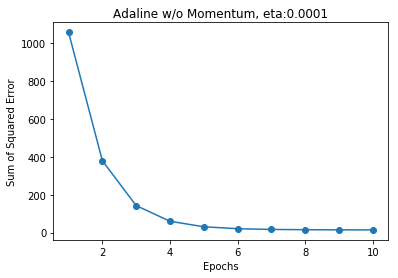

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import joy

X, y = joy.iris_data()
ada1 = AdalineGD(epochs=10, eta=0.0001, random_seed=1).fit(X,y)
plt.plot(range(1, len(ada1.cost_) + 1), ada1.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum of Squared Error')
plt.title('Adaline w/o Momentum, eta:{}'.format(ada1.eta))

### 3.3 모멘텀 추가한 결과 값 비교하기 

강의 영상에서 이미 우리가 관찰했듯이, 여기 예제에서 사용한 붓꽃 자료는 모멘텀을 추가한 것이 이진 분류 모델의 결과에 어떤 차이를 만들어내는지 시각적으로 구별하기 어려울 정도였습니다.  붓꽃 자료에 모멘텀을 적용한 경우와 그렇하지 않은 경우를 각각 그래프로 나타낸 후 우리 자신이 시각적으로 그 차이를 비교하는 코드와 결과가 여기 있습니다. 두 경우 모두 학습률 eta를 작게 설정한 것은 결과를 서로 비교 가능하도록 하기 위함입니다.   

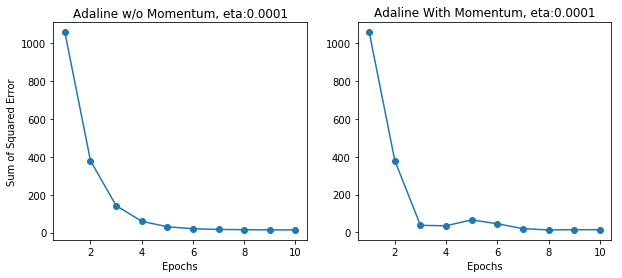

In [13]:
X, y = joy.iris_data()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(epochs=10, eta=0.0001, random_seed=1).fit(X,y)
ax[0].plot(range(1, len(ada1.cost_) + 1), ada1.cost_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Sum of Squared Error')
ax[0].set_title('Adaline w/o Momentum, eta:{}'.format(ada1.eta))

ada2 = AdalineGD_Momentum(epochs=10, eta=0.0001, random_seed=1).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_title('Adaline With Momentum, eta:{}'.format(ada1.eta))
plt.show()

### 3.4 모멘텀 추가한 결과를 한 그래프에서 비교하기

이 과제의 목적은 모멘텀을 적용한 경우와 적용하지 않은 경우를 서로 한 그래프에서 비교할 수 있도록 출력하는 그래프 코드입니다.  좀더 상세한 비교를 위해 학습률($\eta = 0.00005$)을 좀 더 작게 설정하였습니다.  

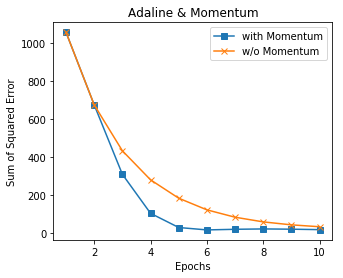

In [20]:
X, y = joy.iris_data()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))
ada1 = AdalineGD(epochs=10, eta=0.00005, random_seed=1).fit(X,y)
ada2 = AdalineGD_Momentum(epochs=10, eta=0.00005, random_seed=1).fit(X, y)
ax.plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='s', label='with Momentum')
ax.plot(range(1, len(ada1.cost_) + 1), ada1.cost_, marker='x', label='w/o Momentum')
ax.set_xlabel('Epochs')
ax.set_ylabel('Sum of Squared Error')
ax.set_title('Adaline & Momentum')
ax.legend(loc='best')
plt.show()

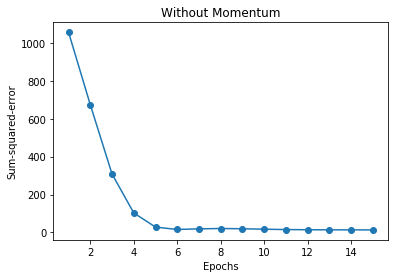

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt 

plt.plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title('Without Momentum')
plt.show()

### 3.2 __붓꽃자료의 전처리__

기계학습에서 자료를 다음과 같은 방법으로 전처리$^{preprocessing}$를 함으로 학습의 속도를 높이거나 비교 분석을 용이하게 합니다. 
좀 더 자세한 자료는 다음을 참고하십시오: [About Feature Scaling and  Normalization](http://sebastianraschka.com/Articles/2014_about_feature_scaling.html) 

- 표준화$^{standardization}$

    특성자료의 분포가 평균이 0이 되고($\mu = 0$), 표준편차($\sigma = 1$)가 1인 표준정규분포 $N(0, 1)$가 되도록 조정하는 것을 표준화(또는 z-score normalization)이라고 합니다.  
    
    \begin{align}
         z &= \frac{x - \mu}{\sigma}  \\
         \mu &= \frac{1}{N} \sum_{i=1}^N (x_i)  \\
         \sigma &= \sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \mu)^2}
    \end{align}

- 정규화$^{normalization}$ 혹은 최소-최대 스케일링$^{Min-Max \ scaling}$

    특성자료의 값들이 모두 0와 1에 오도록 전처리하는 것인데, 정규화 방법은 다음과 같습니다. 
    
    \begin{align}
        X_{norm} = \frac{X - X_{min}}{X_{max}-X_{min}}
    \end{align}

## 8-1 학습 정리
- 경사하강법을 적용하여 가중치 조정하기
- 스텝의 방향과 스텝의 크기(∆𝑤)
- 학습률의 크기
- 아달라인 알고리즘 구현하기

## 8-2 학습 정리
- 붓꽃 학습자료를 이해하기
- 아달라인 객체 생성과 테스트
- 지역 최소, 전역 최소
- 모멘텀


----------------
_For God so loved the world that he gave his one and only Son, that whoever believes in him shall not perish but have eternal life. John3:16_